
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed




Epoch 1/50

87/87 [==============================] - 13s 81ms/step - loss: 0.0012 - val_loss: 9.7553e-04
Epoch 2/50
87/87 [==============================] - 5s 63ms/step - loss: 5.1799e-04 - val_loss: 0.0010
Epoch 3/50
87/87 [==============================] - 5s 62ms/step - loss: 3.9799e-04 - val_loss: 0.0019
Epoch 4/50
87/87 [==============================] - 5s 63ms/step - loss: 3.7022e-04 - val_loss: 0.0033
Epoch 5/50
87/87 [==============================] - 6s 64ms/step - loss: 3.2003e-04 - val_loss: 0.0025
Epoch 6/50
87/87 [==============================] - 6s 65ms/step - loss: 2.6223e-04 - val_loss: 0.0046
Epoch 7/50
87/87 [==============================] - 5s 62ms/step - loss: 2.9916e-04 - val_loss: 7.4131e-04
Epoch 8/50
87/87 [==============================] - 6s 66ms/step - loss: 2.7452e-04 - val_loss: 0.0046
Epoch 9/50
87/87 [==============================] - 6s 64ms/step - loss: 3.2001e-04 - val_loss: 0.0017
Epoch 10/50
87/87 [==============================] - 6s 64ms/step

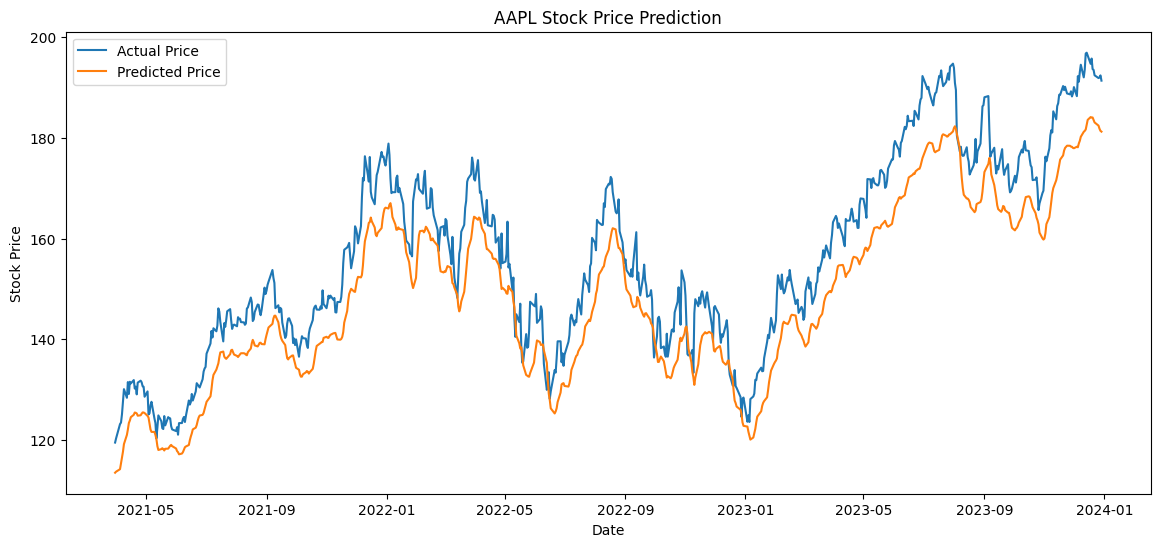

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Stock Data (Example: Apple)
stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start="2010-01-01", end="2024-01-01")

# Use only 'Close' price
data = df[['Close']].values

# Normalize Data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define Sequence Length
seq_length = 60  # Lookback window (60 days)

X, y = create_sequences(data_scaled, seq_length)

# Split Data (80% Training, 20% Testing)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on Test Data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot Results
plt.figure(figsize=(14, 6))
plt.plot(df.index[split+seq_length:], df['Close'].values[split+seq_length:], label="Actual Price")
plt.plot(df.index[split+seq_length:], predictions, label="Predicted Price")
plt.legend()
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


In [2]:
pip install yfinance

     ------------------------------------ 108.5/108.5 kB 165.4 kB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 259.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=26d74a11e427d54777e3d85942a9c5769755ce59c4bc34549f2309ca82098abb
  Stored in directory: c:\users\ssp1_\appdata\local\pip\cache\wheels\af\56\87\585f494e912f4c33a5b6c475a48007d54e564ef1db92e24e84
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.
